In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G=nx.Graph()

In [3]:
inputedges = pd.read_csv('./data/mammal_edges.csv')
inputnodes = pd.read_csv('./data/mammal_nodes.csv')

for i,r in inputnodes.iterrows():
    G.add_node(r['Node'])
    
dfId = pd.DataFrame()
IdCount = 1
for i,r in inputedges.iterrows():
    G.add_edge(r['Source'],r['Target'], weight=r['Weight'])
    
    #Generate the dataset for graphic nodes in Tableau
    temp = pd.DataFrame(columns=["ID", "Node", "Source","Target", "Relationship"])
    s = pd.Series([0,0,0,0,0], index=["ID", "Node", "Source","Target", "Relationship"])
    temp = temp.append(s, ignore_index=True)
    temp["Node"] = r['Source']
    temp["Source"] = r['Source']
    temp["Target"] = r['Target']
    #temp["Weight"] = weight=r['Weight']
    temp["ID"] = IdCount
    temp["Relationship"] = "%s-->%s"%(r['Source'],r['Target'])
    
    dfId = dfId.append(temp)
    temp["Node"] = r['Target']
    dfId = dfId.append(temp)
    IdCount = IdCount + 1

In [4]:
dfId.head()

,ID,Node,Source,Target,Relationship
0,1,Mammal,Mammal,Artiodactyla,Mammal-->Artiodactyla
0,1,Artiodactyla,Mammal,Artiodactyla,Mammal-->Artiodactyla
0,2,Artiodactyla,Artiodactyla,Antilocapridae,Artiodactyla-->Antilocapridae
0,2,Antilocapridae,Artiodactyla,Antilocapridae,Artiodactyla-->Antilocapridae
0,3,Antilocapridae,Antilocapridae,Pronghorn,Antilocapridae-->Pronghorn


In [19]:
pos=nx.spring_layout(G, dim=2, k=0.3, iterations=10, scale=1.0)

# shells = [['Mammal'],\
#  ['Artiodactyla',\
#   'Carnivora',\
#   'Chiroptera',\
#   'Lagomorpha',\
#   'Rodentia',\
#   'Soricomorpha',\
#   'Cetacea',\
#   'Didelphimorphia',\
#   'Perissodactyla',\
#   'Sirenia',\
#   'Cingulata',\
#   'Primates']]
# pos=nx.shell_layout(G, shells)
#pos=nx.shell_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)

In [20]:
nx.set_node_attributes(G,'pos',pos)

In [21]:
labeldict = {}
for i in list(G.nodes()):
    istr = str(i)
    labeldict[i]=istr

In [22]:
# pos[-2] = [100.0, 0.0]
# pos[-1] = [0.0, 100.0]

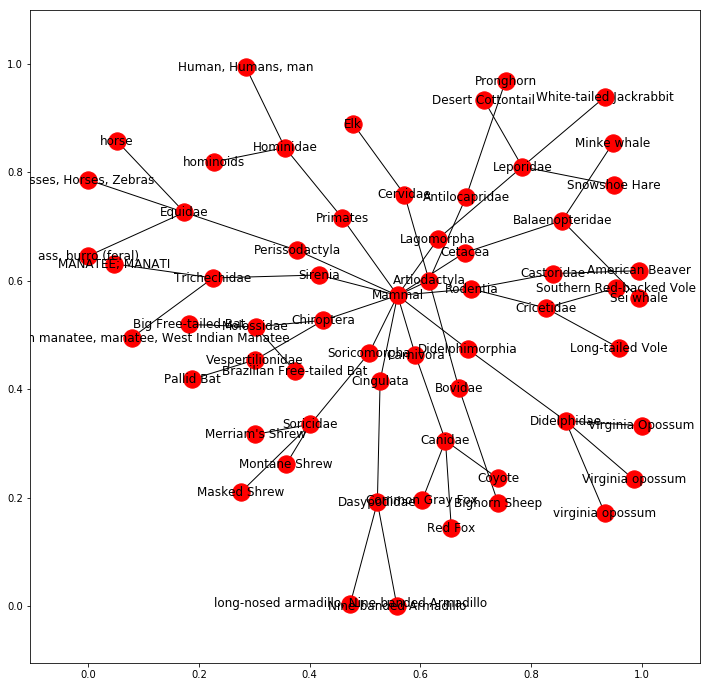

In [23]:
plt.figure(figsize=(12,12))
#nx.draw(G, pos=pos)
nx.draw_networkx(G, pos, labels=labeldict)
#plt.savefig("network_graph.png")
plt.show()

In [24]:
#pos

In [33]:
positions = pd.DataFrame(pos).transpose()
positions.columns = ['X','Y']

In [34]:
positions["CycleY"] = positions["Y"]

In [35]:
positions["Node"] = positions.index

In [36]:
positions.head()

,X,Y,CycleY,Node
American Beaver,0.994642,0.618250,0.618250,American Beaver
Antilocapridae,0.682771,0.753892,0.753892,Antilocapridae
Artiodactyla,0.615992,0.600116,0.600116,Artiodactyla
"Asses, Horses, Zebras",0.000000,0.785645,0.785645,"Asses, Horses, Zebras"
Balaenopteridae,0.856458,0.710699,0.710699,Balaenopteridae


In [37]:
result = pd.merge(dfId, positions, on='Node', how='left')

In [38]:
result = pd.merge(result, inputnodes, on='Node', how='left')

In [41]:
result.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,210.0,53.000000,30.381939,1.0,27.000000,53.000000,79.000000,105.000000
X,210.0,0.544631,0.208521,0.0,0.416853,0.559136,0.680606,1.000000
Y,210.0,0.551398,0.185434,0.0,0.462576,0.572728,0.655908,0.993539
CycleY,210.0,0.551398,0.185434,0.0,0.462576,0.572728,0.655908,0.993539
Weight,210.0,86.666667,58.353266,20.0,50.000000,75.000000,100.000000,200.000000


In [44]:
result.shape

(210, 13)

In [40]:
result.head()

,ID,Node,Source,Target,Relationship,X,Y,CycleY,Category,Order,Family,Common Names,Weight
0,1,Mammal,Mammal,Artiodactyla,Mammal-->Artiodactyla,0.559136,0.572728,0.572728,Mammal,0,0,0,200
1,1,Artiodactyla,Mammal,Artiodactyla,Mammal-->Artiodactyla,0.615992,0.600116,0.600116,0,Artiodactyla,0,0,100
2,2,Artiodactyla,Artiodactyla,Antilocapridae,Artiodactyla-->Antilocapridae,0.615992,0.600116,0.600116,0,Artiodactyla,0,0,100
3,2,Antilocapridae,Artiodactyla,Antilocapridae,Artiodactyla-->Antilocapridae,0.682771,0.753892,0.753892,0,0,Antilocapridae,0,50
4,3,Antilocapridae,Antilocapridae,Pronghorn,Antilocapridae-->Pronghorn,0.682771,0.753892,0.753892,0,0,Antilocapridae,0,50


In [45]:
result.to_csv('./data/mammal_nodepositions.csv', index=False)